* [Dataset Source](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
%matplotlib inline
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("heart.csv")

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.shape

(303, 14)

In [9]:
df.isnull().sum().sort_values(ascending=False)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

* No missing values

<AxesSubplot:ylabel='Frequency'>

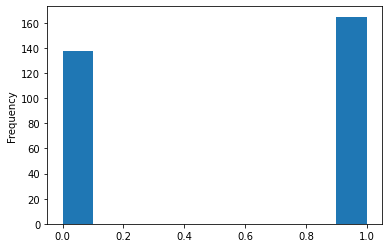

In [8]:
df["output"].plot.hist()

## Model Building

### Splitting into Train and Test dataset

* 70% training data
* 30% test data

In [10]:
from sklearn.model_selection import train_test_split

In [20]:
x = df.drop("output", axis=1)
y = df["output"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [22]:
X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2


In [23]:
y_train

91     1
217    0
278    0
212    0
201    0
      ..
174    0
262    0
161    1
146    1
275    0
Name: output, Length: 212, dtype: int64

In [24]:
X_test

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
51,66,1,0,120,302,0,0,151,0,0.4,1,0,2
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3


In [25]:
y_test

299    0
92     1
140    1
51     1
114    1
      ..
66     1
195    0
76     1
181    0
88     1
Name: output, Length: 91, dtype: int64

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred = model.predict(X_test)

In [32]:
y_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1])

In [36]:
model.score(X_test, y_test)

0.7802197802197802

* **78% accuracy**